## Online Retail Sales Prediction Using K- Nearest Neigbour

In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
data = 'Onlineretail.csv'
df= pd.read_csv(data)

In [97]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [98]:
df.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [99]:
df.shape #541909 observations and 8 features

(541909, 8)

In [5]:
#From the results above, it can be seen that the Description and CustomerID columns have several missing values. We can remove the missing value.

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
#Check again for missing values from the data.
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape #406829 observations and 8 features

(406829, 8)

In [9]:
#Data Manipulation
#Based on the data above, the CustomerID column has a numeric data type in the form of float. We will convert this data into a string type to facilitate the modeling process (if any).

In [10]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.8+ MB


In [14]:
#drop coulum customerID
#df = df.drop(columns=['CustomerID'])

In [15]:
#LET'S ANALYSE  Description Column
#df['Description'] = df['Description'].fillna('No Description')

In [16]:
#LET'S Check null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
#quantity
print('Mean Unit Price : ', df['Quantity'].mean())
print('Median Unit Price : ', df['Quantity'].median())

Mean Unit Price :  12.06130339774205
Median Unit Price :  5.0


C:\Users\Patrick Akinwumi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

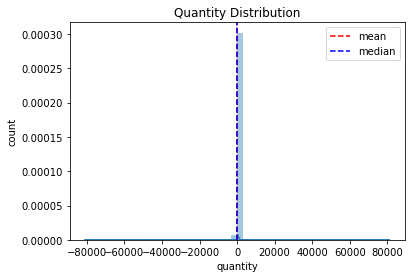

In [18]:
sns.distplot(df['Quantity'])
line3 = plt.axvline(df['Quantity'].mean(), color='r', linestyle='--', label='mean')
line4 = plt.axvline(df['Quantity'].median(), color='b', linestyle='--', label='median')
plt.title('Quantity Distribution')
plt.legend(handles=[line3,line4], loc=1)
plt.xlabel('quantity')
plt.ylabel('count')

In [19]:
#Based on the distribution graph above, we can draw insight that there are some items whose quantity is below 0 or has a negative value. As explained above, a quantity with a negative value is a returned item. Let's create a DataFrame for quantity under 0.

In [20]:
qty_under_zero = df[df['Quantity']<0]
qty_under_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2011 09:57,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,09/12/2011 10:28,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09/12/2011 11:57,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2011 11:58,1.25,17315.0,United Kingdom


In [21]:
#UnitPrice
print('Mean Unit Price : ', df['UnitPrice'].mean())
print('Median Unit Price : ', df['UnitPrice'].median())

Mean Unit Price :  3.4604710185298773
Median Unit Price :  1.95


C:\Users\Patrick Akinwumi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

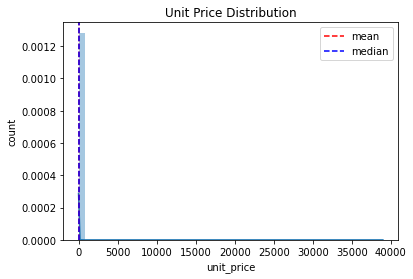

In [22]:
sns.distplot(df['UnitPrice'])
line3 = plt.axvline(df['UnitPrice'].mean(), color='r', linestyle='--', label='mean')
line4 = plt.axvline(df['UnitPrice'].median(), color='b', linestyle='--', label='median')
plt.title('Unit Price Distribution')
plt.legend(handles=[line3,line4], loc=1)
plt.xlabel('unit_price')
plt.ylabel('count')

In [23]:
#Based on the UnitPrice distribution graph, it can be seen that the graph has a long tail to the right. We try to create our own DataFrame for this case.

In [24]:
unit_price_outlier = df[df['UnitPrice']>4]
unit_price_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,01/12/2010 08:34,4.25,13047.0,United Kingdom
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,01/12/2010 08:34,4.95,13047.0,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,01/12/2010 08:34,9.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
406813,581586,20685,DOORMAT RED RETROSPOT,10,09/12/2011 12:49,7.08,13113.0,United Kingdom
406823,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,09/12/2011 12:50,4.15,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [25]:
#let's change the column type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [26]:
#Data set statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0


In [27]:
#hint: Quantity and Unit Price are in the negative in this case, as can be seen. These values should ideally be positive, therefore this has to be considered later.

In [28]:
#Splitting Invoice Date column into year, month, date and time column seperately

In [29]:
df["Year"] = (df["InvoiceDate"]).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = (df["InvoiceDate"]).dt.day
df["Time"] = df["InvoiceDate"].dt.strftime('%H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26


In [30]:
#Country x Numb of Transaction

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26


In [32]:
country_transaction = df['Country'].value_counts().head()

Text(0, 0.5, 'Number of Transaction')

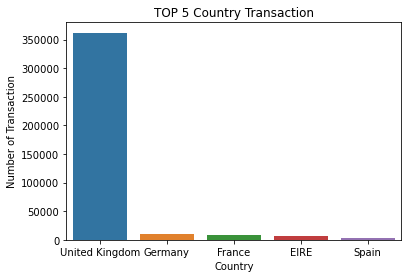

In [33]:
sns.barplot(x=country_transaction.index, y=country_transaction.values)
plt.title('TOP 5 Country Transaction')
plt.xlabel('Country')
plt.ylabel('Number of Transaction')

In [34]:
# UK and other nations are separated by a wide chasm. This is to be expected, particularly if the UK is where the sales centre is located. We are now attempting to verify the volume of transactions in various more nations.

In [35]:
number_country = df['Country'].nunique()
print(f'From these data there are as many as {number_country} Country.')

ctry = pd.DataFrame(df['Country'].value_counts()).reset_index()
ctry.columns = ['Country', 'Numb of Transaction']
ctry

From these data there are as many as 37 Country.


,Country,Numb of Transaction
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1480
9,Australia,1259


In [36]:
#Country x Numb of Customer

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26


In [38]:
country_customer = df[['Country', 'CustomerID']].groupby(['Country'])
country_customer = country_customer.agg({'CustomerID':'nunique'})
country_customer.sort_values(by='CustomerID', ascending=False).reset_index()

,Country,CustomerID
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


In [39]:
#In line with the number of transactions in each country, the number of buyers in the UK, Germany, and France also became the TOP 3 of the number of customers. One interesting example is a customer who comes from an EIRE country but has 7485 transactions.

In [40]:
#Returned Goods

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26


In [42]:
#First, we try to check first how many quantities of goods the buyer returns using the DataFrame that we created earlier.

In [43]:
qty_return = abs(qty_under_zero['Quantity'].sum())
print(f'The number of items returned is {qty_return} pieces')

The number of items returned is 274808 pieces


In [44]:
#Now let's see in detail, what items are returned along with the amount of goods.

In [45]:
qty_under_zero[['Description', 'Quantity']].groupby(['Description']).sum().sort_values(by=['Quantity']).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
Manual,-3995
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150


In [46]:
#The data above shows the five most items returned by buyers. It turns out that the gap between the first and second items and the third to fifth items is quite far.

In [47]:
#Total Amount
#In this section we will display a time series graph of the total amount, especially customers from the UK. The first step we have to do is get rid of the data where the Quantity is negative.

In [48]:
new_df = df.drop(qty_under_zero.index, axis=0).reset_index(drop=True)
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,08:26
...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011,9,12,12:50
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011,9,12,12:50
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9,12,12:50
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9,12,12:50


In [49]:
#After eliminating all rows with Quantity less than zero, next we have to create a column TotalAmount which is the product of Quantity and UnitPrice. Then then we can get rid of the Quantity and UnitPrice fields. Finally, we calculate the TotalAmount in each InvoiceDate.

In [50]:
new_df['TotalAmount'] = new_df['Quantity'] * new_df['UnitPrice']

In [51]:
new_df.drop(new_df[['Quantity', 'UnitPrice']], axis=1, inplace=True)

In [52]:
#Since we will calculate the Total Amount by date, we will create a new column, namely Date with data in the form of purchase date from the InvoiceDate column which contains the date and time of purchase.

In [53]:
new_df['Date'] = [d.date() for d in new_df['InvoiceDate']]
new_df.drop(new_df[['InvoiceDate']], axis=1, inplace=True)
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [54]:
new_df = new_df[['Date', 'InvoiceNo', 'StockCode', 'Description', 
                                       'CustomerID', 'Country', 'TotalAmount']]
new_df.head()

,Date,InvoiceNo,StockCode,Description,CustomerID,Country,TotalAmount
0,2010-01-12,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30
1,2010-01-12,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34
2,2010-01-12,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00
3,2010-01-12,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34
4,2010-01-12,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34


In [55]:
new_df = new_df[['Date', 'TotalAmount']].groupby(['Date'])
new_df = new_df.agg({'TotalAmount': 'sum'}).reset_index()
new_df.head()

,Date,TotalAmount
0,2010-01-12,46376.49
1,2010-02-12,47316.53
2,2010-03-12,23921.71
3,2010-05-12,31771.60
4,2010-06-12,31215.64


In [56]:
#Finally, we just need to plot the line chart with the y-axis column TotalAmount and the x-axis InvoiceDate

Text(0, 0.5, 'TotalAmount')

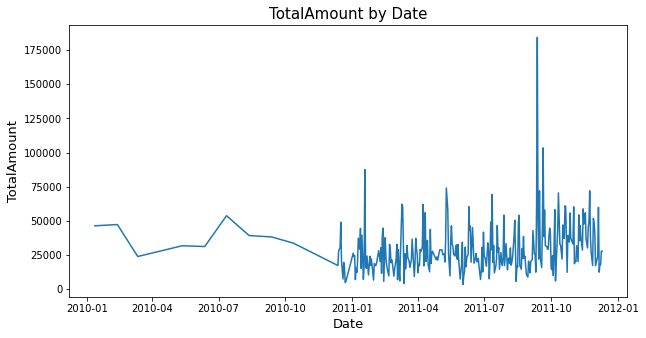

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(data=new_df, x=new_df['Date'], y=new_df['TotalAmount'])
plt.title('TotalAmount by Date', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('TotalAmount', fontsize=13)

In [58]:
#The line chart above shows the movement of TotalAmount which continues to increase, especially from September to December. This is also evidenced by the increase in the baseline in that month. However, is the amount of TotalAmount also affected by the quantity of the goods purchased?

# Model Building

In [59]:
x = df.iloc[:, [3,5]].values
y = df.iloc[:,-1].values


In [60]:
#using the dendrogram to find the optimal number clusters
import scipy.cluster.hierarchy as sch
#dendrogram= sch.dendrogram(sch.linkage(x, method = 'ward'))

In [61]:
print(x)

[[6.   2.55]
 [6.   3.39]
 [8.   2.75]
 ...
 [4.   4.15]
 [4.   4.15]
 [3.   4.95]]


In [62]:
print(y)

['08:26' '08:26' '08:26' ... '12:50' '12:50' '12:50']


In [63]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((325463, 2), (81366, 2), (325463,), (81366,))

In [65]:
print(x_train)

[[ 2.    8.95]
 [ 2.    9.95]
 [10.    1.25]
 ...
 [ 4.    4.15]
 [ 5.    8.5 ]
 [ 3.    4.25]]


In [66]:
print(y_test)

['13:07' '17:12' '15:25' ... '16:21' '09:46' '13:59']


In [67]:
#to standardize. standardadization is done after nirmalisation. standardization is effective when our data is normalised.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [71]:
knn_pred = knn.predict(x_test)
knn_pred

array(['11:09', '13:31', '09:15', ..., '11:32', '11:22', '08:41'],
      dtype=object)

In [72]:
# Checking Model prediction accuracy
from sklearn.metrics import accuracy_score
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

KNN Accuracy 0.64%


In [73]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
sns.heatmap(knn_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

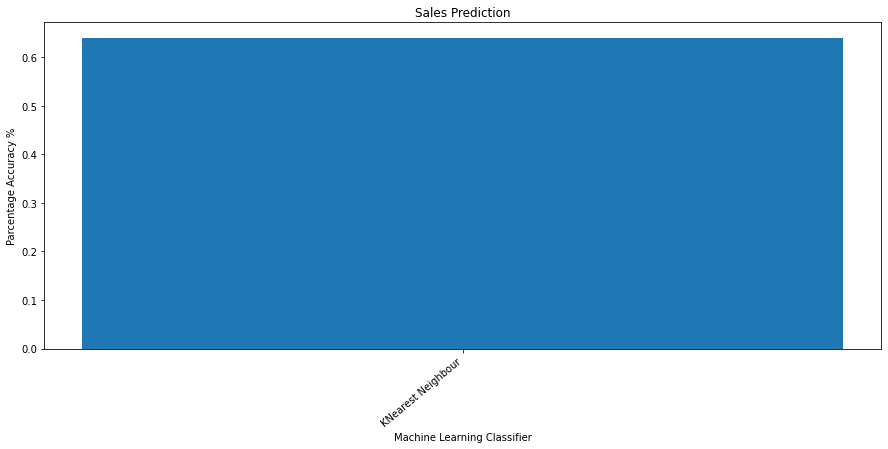

In [115]:
plt.figure(figsize=(15, 6))
model = ['KNearest Neighbour']
model_acc = [ knn_acc]


plt.title('Sales Prediction')
plt.bar(model, model_acc, label=model)
plt.xticks(model, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('Machine Learning Classifier')

plt.show()

In [78]:
#Model Evaluation

In [79]:
#Genrating syntethic data
from sklearn.datasets import make_classification

In [80]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [81]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [84]:
#Building classfier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [86]:
#Prediction Probability
r_probs = [0 for _ in range(len(Y_test))]
knn_probs = knn.predict_proba(X_test)

In [87]:
knn_probs = knn_probs[:, 1]

In [88]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
r_auc = roc_auc_score(Y_test, r_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)

In [90]:
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))

K Nearest Neighbors: AUROC = 0.580


In [91]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

In [92]:
knn_fpr, knn_tpr

(array([0.        , 0.04347826, 0.16908213, 0.50241546, 0.79710145,
        0.97101449, 1.        ]),
 array([0.        , 0.06217617, 0.2642487 , 0.61658031, 0.88082902,
        0.97927461, 1.        ]))

In [93]:
#Plot the ROC curve
import matplotlib.pyplot as plt

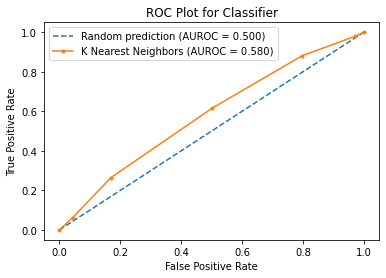

In [116]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
# Title
plt.title('ROC Plot for Classifier')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 

In [ ]:
#